In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, ttest_1samp, ttest_ind, levene,  bartlett
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ztest
import warnings
import math


In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('data/phone.csv')

# Drop the first column
df = df.drop(df.columns[0], axis=1)

# Remove rows where 'brand' is 'undefined'
df = df.drop(df[df['brand'] == 'undefined'].index)

# Select numerical and object columns
df_num = df.select_dtypes(include=['number'])
df_str = df.select_dtypes(include=['object'])

# Print the shape of the dataframe and check for null values
print(df.shape)
print(df.isnull().sum())

(1997, 11)
battery_power    0
clock_speed      0
ram              0
n_cores          0
use_time         0
px_width         0
px_height        0
brand            0
5g               0
grade            0
price            0
dtype: int64


# Nomor 1

In [4]:
IQR = {}

for column in df_num.columns:
  print("Rata-rata kolom", column, "adalah", np.mean(df[column]))
  
  print("Median kolom", column, "adalah", np.median(df[column]))

  mode = stats.mode(df[column])
  print("Modus kolom", column, "adalah", mode.mode, "dengan kemunculan sebanyak", mode.count)

  print("Standar deviasi kolom", column, "adalah", np.std(df[column]))

  print("Variansi kolom", column, "adalah", np.var(df[column]))

  print("Range kolom", column, "adalah", np.ptp(df[column]))

  print("Nilai minimum :", np.min(df[column]))
  print("Nilai Maksimum", np.max(df[column]))

  arr = df[column]
  print("Kuartil 1, 2, dan 3 dari kolom ", column, " adalah")
  print(np.percentile(arr, 25), np.percentile(arr, 50), np.percentile(arr, 75), sep = ", ")

  IQR[column] = np.percentile(df[column], 75) - np.percentile(df[column], 25)
  print("IQR kolom", column, "adalah", IQR[column])

  print("Skewness kolom", column, "adalah", stats.skew(df[column]))

  print("Kurtosis kolom", column, "adalah", stats.kurtosis(df[column]))
  
  print("\n")

Rata-rata kolom battery_power adalah 1920.7194820204913
Median kolom battery_power adalah 1922.31441371664
Modus kolom battery_power adalah 1420.9542711910349 dengan kemunculan sebanyak 1
Standar deviasi kolom battery_power adalah 136.19172952407874
Variansi kolom battery_power adalah 18548.18719075982
Range kolom battery_power adalah 981.0035468694759
Nilai minimum : 1420.9542711910349
Nilai Maksimum 2401.957818060511
Kuartil 1, 2, dan 3 dari kolom  battery_power  adalah
1833.8684847384684, 1922.31441371664, 2011.284926846724
IQR kolom battery_power adalah 177.41644210825552
Skewness kolom battery_power adalah -0.042146095711575744
Kurtosis kolom battery_power adalah 0.21838689089654117


Rata-rata kolom clock_speed adalah 1.102619140443319
Median kolom clock_speed adalah 1.1003787482436298
Modus kolom clock_speed adalah 0.063078405199159 dengan kemunculan sebanyak 1
Standar deviasi kolom clock_speed adalah 0.30077062362949136
Variansi kolom clock_speed adalah 0.09046296803847316
Rang

In [5]:
# DataFrame string
for column in df_str.columns:
  
  # Nilai unik
  print(f"Nilai unik untuk kolom '{column}':")
  print(df_str[column].unique())
  
  # Proporsi
  print("\nProporsi:")
  print(df_str[column].value_counts(normalize=True))
  print()

Nilai unik untuk kolom 'brand':
['appa' 'sumseng' 'oranye' 'largeyou']

Proporsi:
brand
sumseng     0.338007
oranye      0.239359
largeyou    0.212819
appa        0.209815
Name: proportion, dtype: float64

Nilai unik untuk kolom 'grade':
['B' 'C' 'A']

Proporsi:
grade
A    0.346019
B    0.341512
C    0.312469
Name: proportion, dtype: float64



# Nomor 2

In [6]:
# Check if an outlier Exist

# Outlier will be handled using IQR Method
counter = 0
for column in df_num.columns:

  # Calculate Q1, Q3, and IQR
  Q1 = df_num[column].quantile(0.25)
  Q3 = df_num[column].quantile(0.75)
  IQR = Q3 - Q1

  # Calculate lower bound and upper bound
  lowerBound = Q1 - 1.5 * IQR
  upperBound = Q3 + 1.5 * IQR
    
  # Outlier identifier
  outliers = df_num[(df_num[column] < lowerBound) | (df_num[column] > upperBound)]
  
  # Check if an outlier exist
  if not outliers.empty:
    print(f"Outlier dari kolom {column} adalah:")
    print(outliers[column])
    print()
    print(f"Jumlah Outliers: : {len(outliers)}")
    counter += len(outliers)
print(f"Jumlah Total Outliers: {counter}")

Outlier dari kolom battery_power adalah:
117     1553.766029
120     1493.397642
210     1563.639346
282     2289.251076
378     2307.072694
438     2401.957818
492     2289.348438
536     1525.842443
718     1566.283517
754     1557.530230
762     1488.948363
903     2363.451821
986     2331.185458
1005    1534.668853
1199    1420.954271
1206    1477.965749
1234    1550.042708
1319    1530.624039
1511    1522.055910
1575    1519.032034
1643    2321.463264
1685    2291.581698
1908    2281.544845
1948    2352.078882
1968    1506.515170
Name: battery_power, dtype: float64

Jumlah Outliers: : 25
Outlier dari kolom clock_speed adalah:
145     1.981452
186     1.954328
214     0.269403
290     0.256667
394     0.285339
506     1.917131
936     1.974235
1156    0.063078
1351    0.086511
1372    0.287064
1571    2.145640
1638    2.056815
1808    0.188163
1858    0.202770
1912    0.178785
Name: clock_speed, dtype: float64

Jumlah Outliers: : 15
Outlier dari kolom ram adalah:
27       0.473096


Ketika outlier dari seluruh data sudah didapatkan, terdapat beberapa cara yang dapat dilakukan untuk mengatasi Outliers. Beberapa cara tersebut diantaranya : 
1. Menghapus Outliers
2. Membatasi Outliers pada value tertentu
3. Menggantikan data outliers dengan data yang lebih valid seperti dengan rata-rata atau median

Pada implementasi kami, kami memutuskan untuk menghandle data tersebut dengan merubah data outlier menjadi rata-rata dari tiap columnya. Hal ini karena ada kemungkinan terjadi kerusakan data yang nantinya mungkin akan digunakan ketika penghapusan data dilakukan.

In [7]:
# Change the outlier data into a mean of the current column
for column in df_num.columns:
  Q1 = df_num[column].quantile(0.25)
  Q3 = df_num[column].quantile(0.75)
  IQR = Q3 - Q1
  lowerBound = Q1 - 1.5 * IQR
  upperBound = Q3 + 1.5 * IQR
  mean = df_num[column].mean()
  
  df_num[column] = np.where((df_num[column] < lowerBound) | (df_num[column] > upperBound), mean, df_num[column])


# Nomor 3 dan 4

## 5G

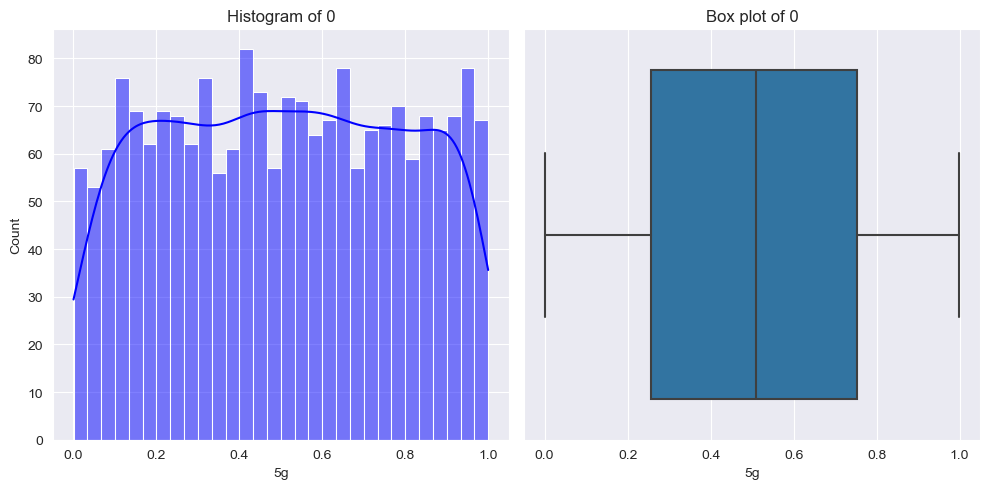

Grafik tersebut Normal yaitu terdistribusi secara uniform


In [8]:
# DataFrame numerik
# Buat figure
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_num["5g"], kde=True, color='blue', bins=30)
plt.title(f'Histogram of {0}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_num["5g"], orient='h')
plt.title(f'Box plot of {0}')

# Tampilkan plot
plt.tight_layout()
plt.show()


print("Grafik tersebut Normal yaitu terdistribusi secara uniform")

## Battery Power

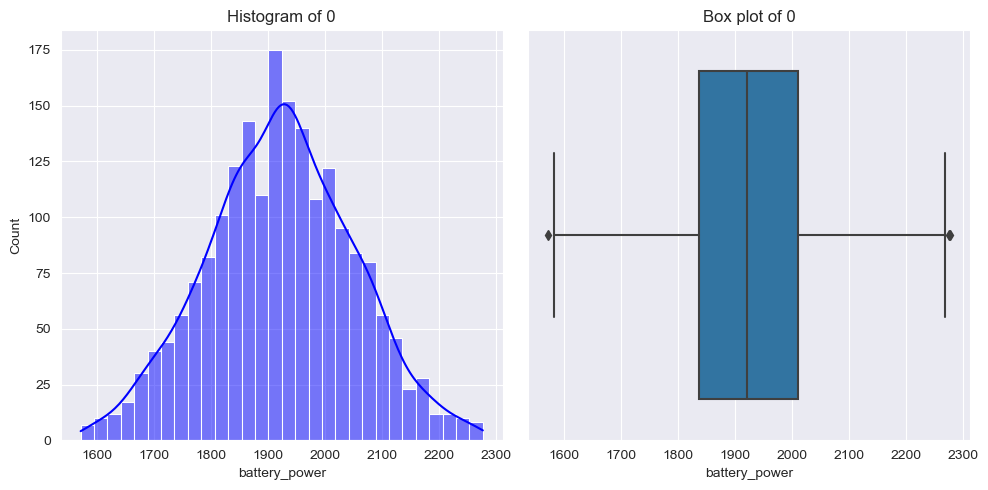

Grafik tersebut Normal 


In [9]:
# DataFrame numerik
# Buat figure
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_num["battery_power"], kde=True, color='blue', bins=30)
plt.title(f'Histogram of {0}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_num["battery_power"], orient='h')
plt.title(f'Box plot of {0}')

# Tampilkan plot
plt.tight_layout()
plt.show()


print("Grafik tersebut Normal ")

## Clock Speed

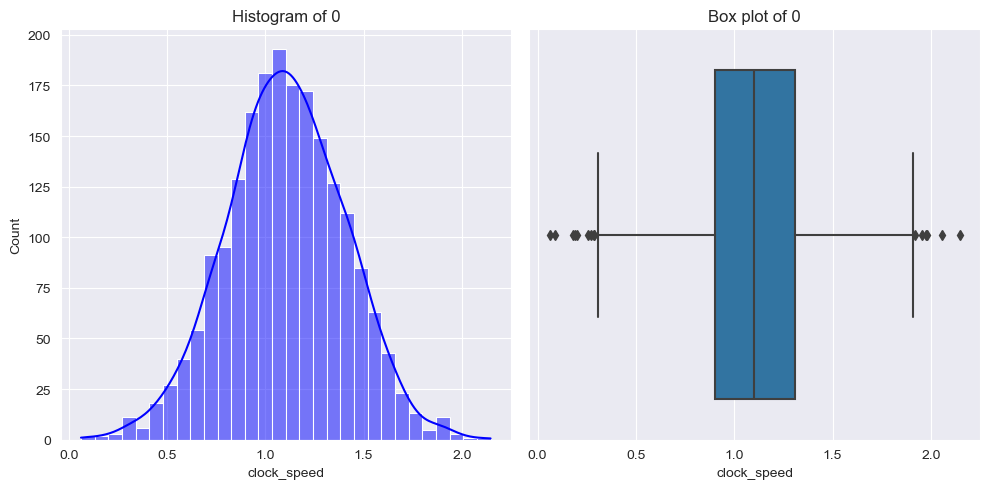

Data yang ditampilkan terlihat normal


In [10]:
# DataFrame numerik
# Buat figure
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["clock_speed"], kde=True, color='blue', bins=30)
plt.title(f'Histogram of {0}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["clock_speed"], orient='h')
plt.title(f'Box plot of {0}')

# Tampilkan plot
plt.tight_layout()
plt.show()

print("Data yang ditampilkan terlihat normal")

## Ram

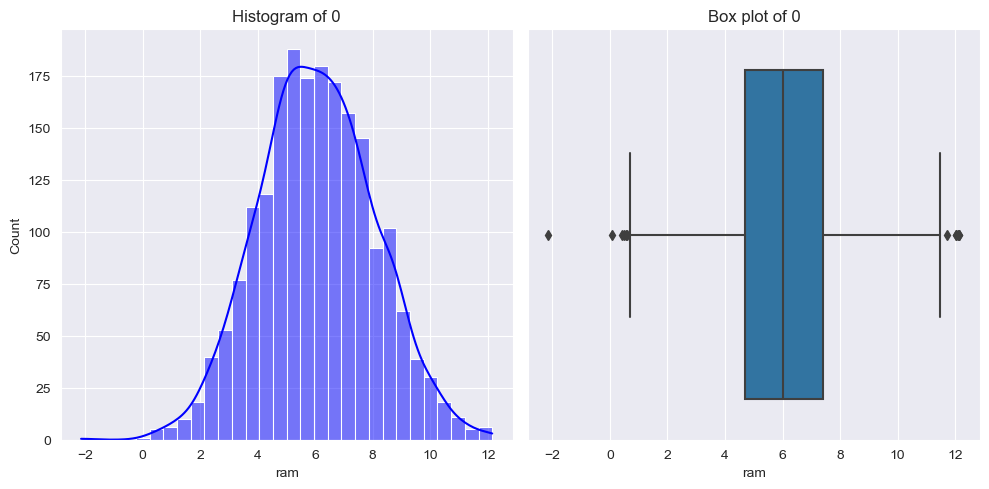

Data yang ditampilkan terlihat normal


In [11]:
# DataFrame numerik
# Buat figure
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["ram"], kde=True, color='blue', bins=30)
plt.title(f'Histogram of {0}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["ram"], orient='h')
plt.title(f'Box plot of {0}')

# Tampilkan plot
plt.tight_layout()
plt.show()

print("Data yang ditampilkan terlihat normal")

## N_Cores

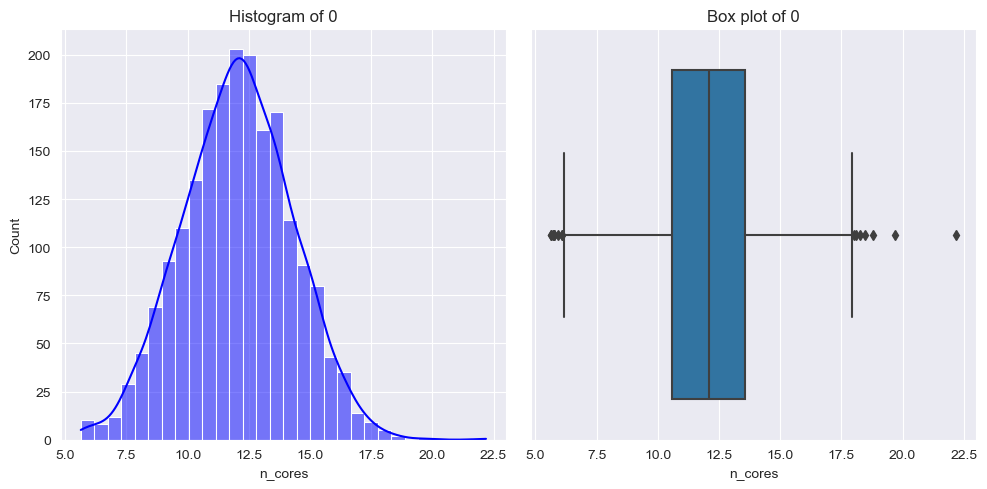

Data yang ditampilkan terlihat normal


In [12]:
# DataFrame numerik
# Buat figure
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["n_cores"], kde=True, color='blue', bins=30)
plt.title(f'Histogram of {0}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["n_cores"], orient='h')
plt.title(f'Box plot of {0}')

# Tampilkan plot
plt.tight_layout()
plt.show()

print("Data yang ditampilkan terlihat normal")

## Px_Width

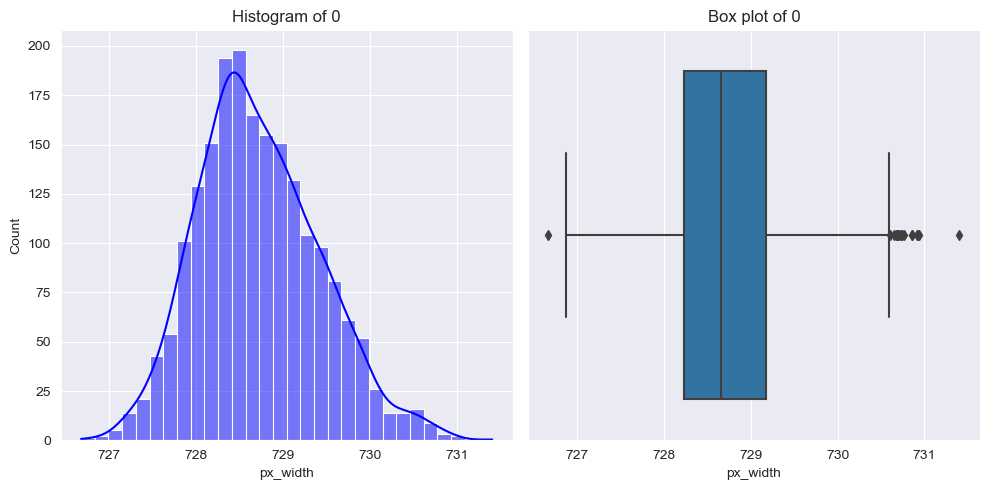

Data yang ditampilkan terlihat normal


In [13]:
# DataFrame numerik
# Buat figure
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["px_width"], kde=True, color='blue', bins=30)
plt.title(f'Histogram of {0}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["px_width"], orient='h')
plt.title(f'Box plot of {0}')

# Tampilkan plot
plt.tight_layout()
plt.show()

print("Data yang ditampilkan terlihat normal")

## Px_Height

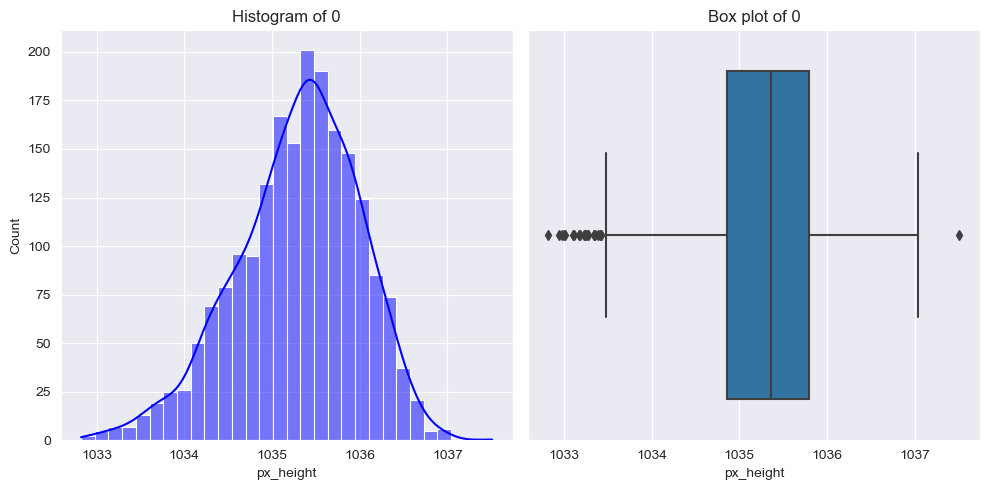

Data yang ditampilkan terlihat normal


In [14]:
# DataFrame numerik
# Buat figure
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["px_height"], kde=True, color='blue', bins=30)
plt.title(f'Histogram of {0}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["px_height"], orient='h')
plt.title(f'Box plot of {0}')

# Tampilkan plot
plt.tight_layout()
plt.show()

print("Data yang ditampilkan terlihat normal")

## Price

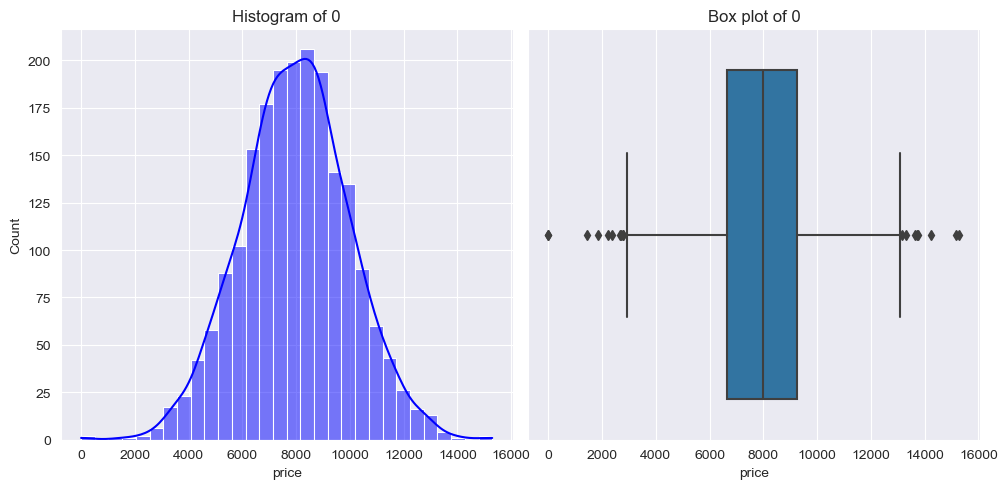

Data yang ditampilkan terlihat normal


In [15]:
# DataFrame numerik
# Buat figure
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["price"], kde=True, color='blue', bins=30)
plt.title(f'Histogram of {0}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price"], orient='h')
plt.title(f'Box plot of {0}')

# Tampilkan plot
plt.tight_layout()
plt.show()

print("Data yang ditampilkan terlihat normal")

## Brand

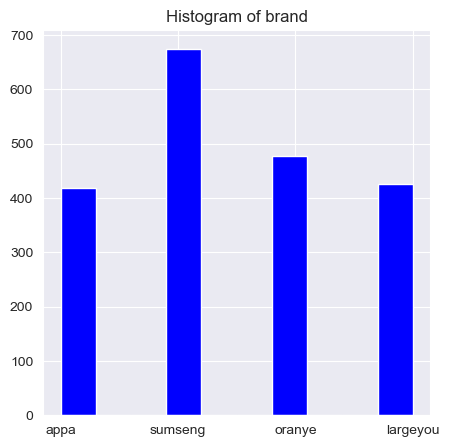

Data Brand normal


In [16]:
# Buat figure
plt.figure(figsize=(5, 5) , dpi=100)

# Histogram
plt.hist(df_str["brand"], bins=10, color='blue')
plt.title(f'Histogram of {"brand"}')

# Tampilkan plot
plt.show()
print("Data Brand normal")

## Grade

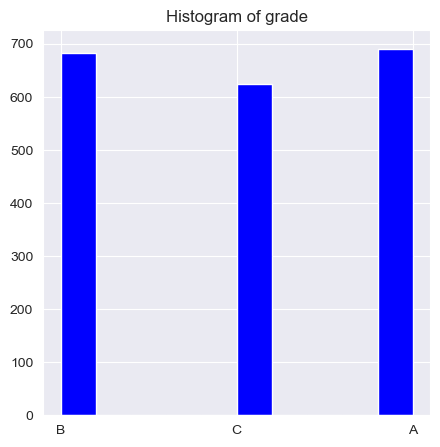

Data Price normal


In [17]:
# Buat figure
plt.figure(figsize=(5, 5) , dpi=100)

# Histogram
plt.hist(df_str["grade"], bins=10, color='blue')
plt.title(f'Histogram of {"grade"}')

# Tampilkan plot
plt.show()
print("Data Price normal")

# Nomor 5

Langkah Percobaan : 
1. Menentukan H0
2. Menentukan H1
3. Menentukan tingkat signifikan α, pada soal ini akan digunakan 0.05 sebagai α nya
4. tentukan uji statistik yang sesuai dan menentukan daerah kritis
5. Menghitung uji statistik dari data sample. Menghitung p-value sesuai uji statistik
6. Mengambilkan Keputusan berupa TOLAK H0 jika terletak di daerah kritis atau dengan tes signifikan atau TOLAK H0 jika p-value lebih kecil dibanding α yang diinginkan.

In [18]:
# Hipotesis 1: rata-rata nilai battery_power lebih dari 1800

# H0 pada soal ini adalah rata-rata nilai battery memiliki rata-rata di atas 1800


mu = 1800
battery_power = df_num['battery_power']

mean_battery_power = battery_power.mean()
std_battery_power  = battery_power.std()

alpha = 0.05

# Z alpha
alpha_z = stats.norm.ppf(1 - alpha)

# Z value
Z = (mean_battery_power - mu) / (std_battery_power / math.sqrt(len(battery_power)))

# P Value
p_value = stats.norm.sf(abs(Z))

print(f"P VALUE: {p_value}")
print(f"Alpha Z value: {alpha_z}")
if p_value > alpha_z:
    print("H0 DITERIMA")
else:
    print("H0 DITOLAK")

Z_value, p_value = ztest(battery_power,value=mu)
print(f"Hipotesis 1: rata-rata nilai battery_power lebih dari 1800")
print(f"Z: {Z_value}, p-value: {p_value}\n")

P VALUE: 0.0
Alpha Z value: 1.6448536269514722
H0 DITOLAK
Hipotesis 1: rata-rata nilai battery_power lebih dari 1800
Z: 42.30849337937655, p-value: 0.0



# Penjelasan no 5.1
1. H0 pada soal ini adalah rata-rata nilai battery memiliki rata-rata di atas 1800
2. H1 pada soal ini adalah rata-rata nilai battery memiliki rata-rata tidak di atas 1800
3. Menentukan tingkat signifikan α, pada soal ini akan digunakan 0.025 sebagai α nya
4. Didapatkan nilai Z alpha sebesar 1.64
5. Didapatkan nilai p-value sebesar 0.0
6. Keputusan yang diambil adalah H0 DITOLAK karena p-value lebih kecil dibanding Z alpha

In [19]:
# H0 : ram smartphone pada dataset adalah 8 GB
import math

mu = 8
ram = df_num['ram']

mean_ram = ram.mean()
std_ram  = ram.std()

alpha = 0.05 / 2

# Z alpha
alpha_z = stats.norm.ppf(1 - alpha)

# Z value
z = (mean_ram - mu) / (std_ram / math.sqrt(len(ram)))

# P Value
p_value_e = 2 * stats.norm.sf(abs(z))

print(f"P VALUE: {p_value_e}")
print(f"Alpha Z value: {alpha_z}")
print(f"Z value: {z}")
if p_value_e > alpha_z:
    print("H0 DITERIMA")
else:
    print("H0 DITOLAK")

Z_value, p_value = ztest(ram,value=mu)
print(f"Hipotesis 1: rata-rata nilai ram sama dengan 8")
print(f"Z: {Z_value}, p-value: {p_value}\n")

P VALUE: 0.0
Alpha Z value: 1.959963984540054
Z value: -44.63076696385516
H0 DITOLAK
Hipotesis 1: rata-rata nilai ram sama dengan 8
Z: -44.63076696385521, p-value: 0.0



# Penjelasan no 5.2
1. H0 pada soal ini adalah rata-rata ram smartphone pada dataset 8 GB
2. H1 pada soal ini adalah rata-rata ram smartphone pada dataset tidak 8 GB
3. Menentukan tingkat signifikan α, pada soal ini akan digunakan 0.025 sebagai α nya
4. Didapatkan nilai Z alpha sebesar 1.96
5. Didapatkan nilai p-value sebesar 0.0
6. Keputusan yang diambil adalah H0 DITOLAK karena p-value lebih kecil dibanding Z alpha

In [20]:
# H0 : rata-rata clock_speed 250 data pertama == 1
mu = 1
clock_speed = df_num['clock_speed'].head(250)

mean_clock_speed = clock_speed.mean()
std_clock_speed = clock_speed.std()

alpha = 0.05 / 2

# Z alpha
alpha_z = stats.norm.ppf(1 - alpha)

# Z value
z = (mean_clock_speed - mu) / (std_clock_speed / math.sqrt(len(clock_speed)))

p_value = 2 * stats.norm.sf(abs(z))

print(f"P VALUE: {p_value}")
print(f"Alpha Z value: {alpha_z}")
print(f"Z value: {z}")
if p_value > alpha_z:
    print("H0 DITERIMA")
else:
    print("H0 DITOLAK")

z_statistic, p_value = ztest(clock_speed, value=mu)
print(f"Hipotesis 3: rata-rata clock_speed 250 data pertama tidak sama dengan 1")
print(f"Z-statistic: {z_statistic}, p-value: {p_value}\n")

P VALUE: 1.593181050974873e-05
Alpha Z value: 1.959963984540054
Z value: 4.315394530099857
H0 DITOLAK
Hipotesis 3: rata-rata clock_speed 250 data pertama tidak sama dengan 1
Z-statistic: 4.315394530099855, p-value: 1.5931810509748815e-05



# Penjelasan no 5.3
1. H0 pada soal ini adalah rata-rata clock_speed 250 data pertama tidak sama dengan 1
2. H1 pada soal ini adalah rata-rata clock_speed 250 data pertama sama dengan 1
3. Menentukan tingkat signifikan α, pada soal ini akan digunakan 0.025 sebagai α nya
4. Didapatkan nilai Z alpha sebesar 1.96
5. Didapatkan nilai p-value sebesar 1.59
6. Keputusan yang diambil adalah H0 DITOLAK karena p-value lebih kecil dibanding Z alpha

In [21]:
# Hipotesis 4: rata-rata use_time smartphone merek “appa” lebih dari 8.5 tidak sama dengan 35%
mu = 8.5
prop = 0.35
use_time = df.loc[(df['brand'] == 'appa') & (df['use_time'] > 8.5), 'use_time']


mean_use_time = use_time.mean()
std_use_time = use_time.std()

alpha = 0.05 / 2

# Z alpha
alpha_z = stats.norm.ppf(1 - alpha)

# Z value
z = (mean_use_time - mu) / (std_use_time / math.sqrt(len(use_time)))

p_value = 2 * stats.norm.sf(abs(z))

print(f"P VALUE: {p_value}")
print(f"Alpha Z value: {alpha_z}")
print(f"Z value: {z}")
if p_value > alpha_z:
    print("H0 DITERIMA")
else:
    print("H0 DITOLAK")

z_statistic, p_value = ztest(use_time, value=mu)
print(f"Hipotesis 4: rata-rata use_time smartphone merek “appa” lebih dari 8.5 tidak sama dengan 35%")
print(f"z-statistic: {z_statistic}, p-value: {p_value}\n")

P VALUE: 1.7602880982328168e-51
Alpha Z value: 1.959963984540054
Z value: 15.094495614517998
H0 DITOLAK
Hipotesis 4: rata-rata use_time smartphone merek “appa” lebih dari 8.5 tidak sama dengan 35%
z-statistic: 15.094495614518, p-value: 1.760288098232742e-51



# Penjelasan no 5.4
1. H0 pada soal ini adalah rata-rata use_time smartphone merek "appa" lebih dari 8.5 tidak sama dengan 35%
2. H1 pada soal ini adalah rata-rata use_time smartphone merek "appa" lebih dari 8.5 sama dengan 35%
3. Menentukan tingkat signifikan α, pada soal ini akan digunakan 0.025 sebagai α nya
4. Didapatkan nilai Z alpha sebesar 1.96
5. Didapatkan nilai p-value sebesar 1.76e-51
6. Keputusan yang diambil adalah H0 DITOLAK karena p-value lebih kecil dibanding Z alpha

# Nomor 6

In [22]:
# Bagi dataset menjadi dua bagian
half = len(df) // 2
df_first_half = df.iloc[:half]
df_second_half = df.iloc[half:]

In [23]:
# H0: rata-rata n_cores smartphone generasi sebelumnya sama dengan generasi sekarang
n_cores_first = df_first_half['n_cores']
n_cores_second = df_second_half['n_cores']
t_statistic, p_value = ttest_ind(n_cores_first, n_cores_second)
print(f"Hipotesis 1: rata-rata n_cores smartphone generasi sebelumnya sama dengan generasi sekarang")
print(f"t-statistic: {t_statistic}, p-value: {p_value}\n")

Hipotesis 1: rata-rata n_cores smartphone generasi sebelumnya sama dengan generasi sekarang
t-statistic: 1.1014725388987614, p-value: 0.2708239208454442



In [24]:
# Hipotesis 2: harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya
price_first = df_first_half['price']
price_second = df_second_half['price']
t_statistic, p_value = ttest_ind(price_first, price_second - 100)
print(f"Hipotesis 2: harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya")
print(f"t-statistic: {t_statistic}, p-value: {p_value}\n")

Hipotesis 2: harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya
t-statistic: 1.138341115417425, p-value: 0.25511475206726353



In [25]:
# Hipotesis 3: variansi px_height sama pada kedua generasi
px_height_first = df_first_half['px_height']
px_height_second = df_second_half['px_height']
statistic, p_value = levene(px_height_first, px_height_second)
print(f"Hipotesis 3: variansi px_height sama pada kedua generasi")
print(f"statistic: {statistic}, p-value: {p_value}\n")

Hipotesis 3: variansi px_height sama pada kedua generasi
statistic: 1.0282193053637632, p-value: 0.3107002291908578



In [26]:
# Hipotesis 4: proporsi battery_power > 2030 lebih besar pada generasi sebelumnya
battery_power_first = df_first_half['battery_power'] > 2030
battery_power_second = df_second_half['battery_power'] > 2030
n_first = len(battery_power_first)
n_second = len(battery_power_second)
success_first = sum(battery_power_first)
success_second = sum(battery_power_second)
z_statistic, p_value = proportions_ztest([success_first, success_second], [n_first, n_second], alternative='larger')
print(f"Hipotesis 4: proporsi battery_power > 2030 lebih besar pada generasi sebelumnya")
print(f"z-statistic: {z_statistic}, p-value: {p_value}\n")

Hipotesis 4: proporsi battery_power > 2030 lebih besar pada generasi sebelumnya
z-statistic: -0.48675732124828175, p-value: 0.6867848407771946

